<a href="https://colab.research.google.com/github/nayse/pp/blob/main/planej_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img, save_img
from tensorflow.keras import layers, models

In [43]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# Upload do Dataset: aneurismas rompidos e não rompidos

In [44]:
train_datagen = ImageDataGenerator(rescale=1/255.0)

aneurismas = '/content/drive/My Drive/Colab Notebooks/fotos'

train_generator = train_datagen.flow_from_directory(
    aneurismas,
    target_size=(128, 128),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary')  

Found 12 images belonging to 2 classes.


# Upload dos parâmentros de Teste: imagens 28x28 e 48x48

In [45]:

dimensoes = '/content/drive/My Drive/Colab Notebooks/dimensoes'

val_datagen = ImageDataGenerator(rescale=1/255.0)
val_generator = val_datagen.flow_from_directory(
    dimensoes,
    target_size=(128, 128),
    color_mode='rgb',
    batch_size=16,
    class_mode='binary')  

Found 24 images belonging to 4 classes.


# Treianemento da Rede Neural

In [46]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)      

# Criação de Camadas

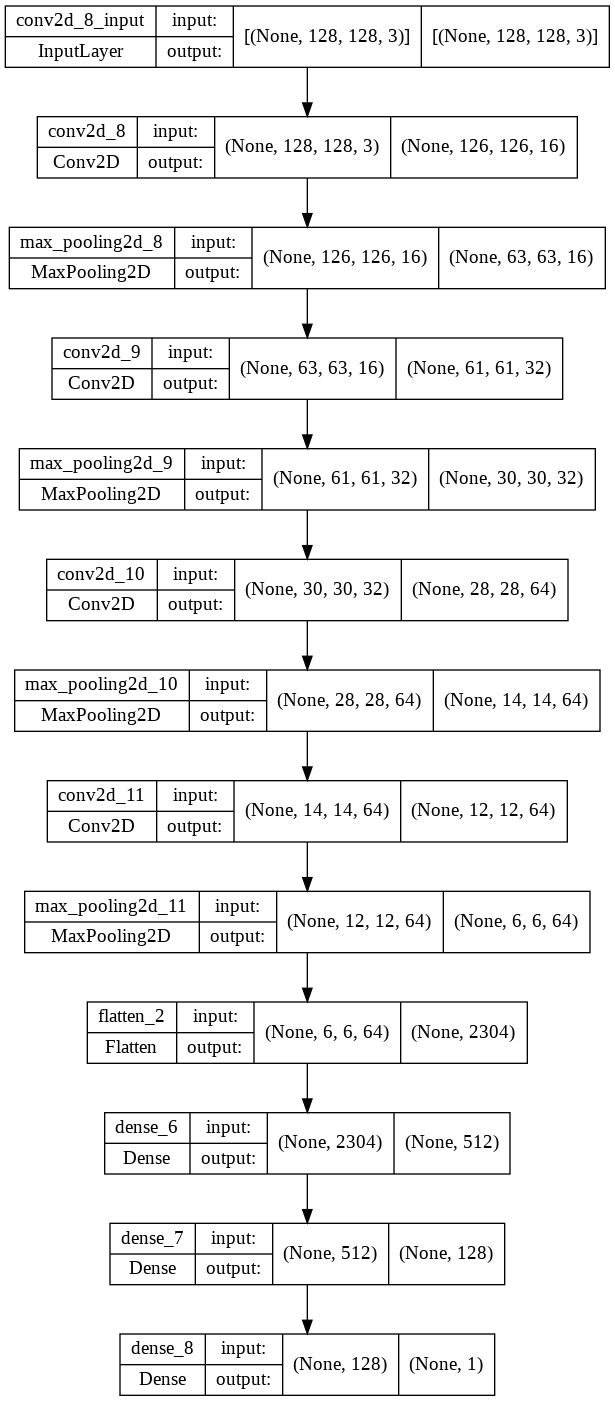

In [47]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
)

In [48]:
opt = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
      train_generator,
      steps_per_epoch=np.ceil(1486 /32), 
      epochs=5,
      verbose=1,
      validation_data = val_generator,
      validation_steps=np.ceil(382 /16))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


47/47 [==============================] - 1s 9ms/step - loss: 0.6901 - accuracy: 0.5000 - val_loss: 0.4879 - val_accuracy: 0.2500


# Testes:

Imagem do Teste 1 obtida do site: https://radiopaedia.org/cases/cerebral-aneurysm-rupture

[[0.56983066]]
aneurisma rompido


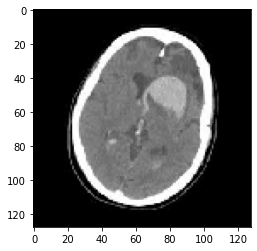

In [49]:
# load image and test the model
img = load_img('/content/drive/My Drive/Colab Notebooks/imagem_teste.jfif', color_mode='rgb', target_size=(128,128))
img_array = img_to_array(img)/255.0 
x = np.expand_dims(img_array, 0)

out = model.predict(x)
print(out)
if out <0.5:
  print('aneurisma não rompido')
else:
   print('aneurisma rompido')

plt.imshow(img)

[[0.49576128]]
aneurisma não rompido


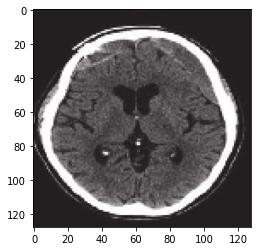

In [51]:
# load image and test the model
img = load_img('/content/drive/My Drive/Colab Notebooks/imagem_teste2.jpg', color_mode='rgb', target_size=(128,128))
img_array = img_to_array(img)/255.0 
x = np.expand_dims(img_array, 0)

out = model.predict(x)
print(out)
if out <0.5:
  print('aneurisma não rompido')
else:
   print('aneurisma rompido')

plt.imshow(img)

Imagem do Teste 3 obtida do site: http://neuroradiologyteachingfiles.com/eka.html

[[0.6240051]]
aneurisma rompido


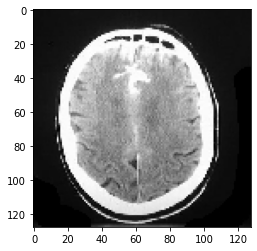

In [34]:
# load image and test the model
img = load_img('/content/drive/My Drive/Colab Notebooks/imagem_teste3.jpg', color_mode='rgb', target_size=(128,128))
img_array = img_to_array(img)/255.0 
x = np.expand_dims(img_array, 0)

out = model.predict(x)
print(out)
if out <0.5:
  print('aneurisma não rompido')
else:
   print('aneurisma rompido')

plt.imshow(img)